<a href="https://colab.research.google.com/github/shu65/diffusion-model-book/blob/main/diffusion_model_book_1_5_1_langevin_monte_carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
%matplotlib inline
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [17]:
def log_p_dist(x):
  dist0 = torch.distributions.MultivariateNormal(torch.tensor([-2, -2]), torch.eye(2))
  p0 = torch.exp(dist0.log_prob(x))
  dist1 = torch.distributions.MultivariateNormal(torch.tensor([2, 2]), torch.eye(2))
  p1 = torch.exp(dist1.log_prob(x))
  return torch.log((p0 + p1)/2.0)

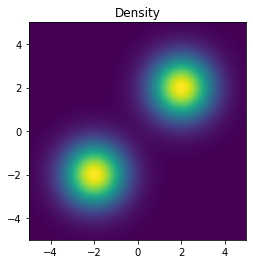

In [18]:
r = np.linspace(-5, 5, 1000)
x0, x1 = np.meshgrid(r, r)
x = torch.tensor(np.vstack([x0.flatten(), x1.flatten()]).T)

log_p = log_p_dist(x)
p = torch.exp(log_p)
plt.pcolormesh(x0, x1, p.reshape(x0.shape), cmap='viridis')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.title('Density')
plt.show()

In [19]:
def langevin_monte_carlo_algorithm(log_p_dist, n_samples=100000, alpha=0.001):
    burn_in = 10000
    x0 = torch.randn(1, 2)
    xi = x0
    samples = []
    for i in tqdm(range(n_samples + burn_in)):
        xi.requires_grad_()
        log_p = log_p_dist(xi)
        score = torch.autograd.grad(log_p, xi)[0]
        ui = torch.randn(1, 2)
        xi = xi.detach() + alpha * score + np.sqrt(2 * alpha) * ui
        samples.append(xi.detach().numpy())
    return np.concatenate(samples, 0)[burn_in:]

<ipython-input-19-a11c79f1e0bc>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(n_samples + burn_in)):


  0%|          | 0/110000 [00:00<?, ?it/s]

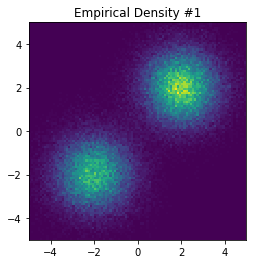

In [20]:
samples_1em1 = langevin_monte_carlo_algorithm(log_p_dist, alpha=1e-1)

plt.hist2d(samples_1em1[:,0], samples_1em1[:,1], range=((-5, 5), (-5, 5)), cmap='viridis', rasterized=False, bins=100, density=True)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.title('Empirical Density #1')
plt.show()

<ipython-input-4-a9e25dda67d3>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(n_samples + burn_in)):


  0%|          | 0/110000 [00:00<?, ?it/s]

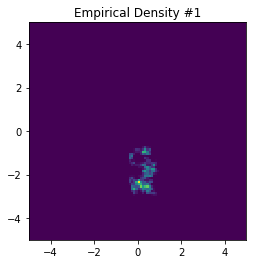

In [15]:
samples_1em5 = langevin_monte_carlo_algorithm(log_p_dist, alpha=1e-5)

plt.hist2d(samples_1em5[:,0], samples_1em5[:,1], range=((-5, 5), (-5, 5)), cmap='viridis', rasterized=False, bins=100, density=True)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.title('Empirical Density #1')
plt.show()